In [2]:
# Install and import required libraries
!pip install scikit-learn pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load a ready-made dataset for price prediction
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = data.frame

# Show first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Select important columns (features) and the target (price)
X = df[["MedInc", "HouseAge", "AveRooms", "AveOccup"]]  # input features
y = df["MedHouseVal"]  # target output

# Check shape of the data
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (20640, 4)
Target shape: (20640,)


In [7]:
from sklearn.model_selection import train_test_split

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 16512
Testing samples: 4128


In [8]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

print("✅ Model training completed successfully!")

✅ Model training completed successfully!


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using test data
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.657451727882265
R² Score: 0.49828508595474374


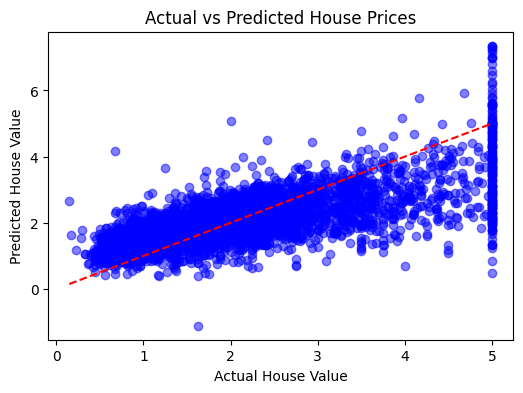

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [11]:
import pandas as pd

coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coefficients

,Coefficient
MedInc,0.445466
HouseAge,0.016904
AveRooms,-0.028381
AveOccup,-0.004144
